## Making equal area grid

In [1]:
import ELL_map_class as ELL_map
import numpy as np

In [17]:
inc_std = 80
inc = (90-inc_std) *  np.pi / 180
deltaphi = 0
nlat, nlon = 10, 18
this_map = ELL_map.map(nlat=nlat, nlon=nlon, type='eqarea', inc=inc, deltaphi=deltaphi) #ELL_map.map returns a class object 

Created equa-area grid of 154 cells, in 10 latitude grids with [ 6 12 16 20 23 23 20 16 12  6] lontitude cells.
Non-finite projected corners; need to fix this.
Non-finite projected corners; need to fix this.


In [9]:
this_map.corners_latlon.mean(2)[:,1]

array([0.52359878, 1.57079633, 2.61799388, 3.66519143, 4.71238898,
       5.75958653, 0.26179939, 0.78539816, 1.30899694, 1.83259571,
       2.35619449, 2.87979327, 3.40339204, 3.92699082, 4.45058959,
       4.97418837, 5.49778714, 6.02138592, 0.17453293, 0.52359878,
       0.87266463, 1.22173048, 1.57079633, 1.91986218, 2.26892803,
       2.61799388, 2.96705973, 3.31612558, 3.66519143, 4.01425728,
       4.36332313, 4.71238898, 5.06145483, 5.41052068, 5.75958653,
       6.10865238, 0.13089969, 0.39269908, 0.65449847, 0.91629786,
       1.17809725, 1.43989663, 1.70169602, 1.96349541, 2.2252948 ,
       2.48709418, 2.74889357, 3.01069296, 3.27249235, 3.53429174,
       3.79609112, 4.05789051, 4.3196899 , 4.58148929, 4.84328867,
       5.10508806, 5.36688745, 5.62868684, 5.89048623, 6.15228561,
       0.10833078, 0.32499234, 0.54165391, 0.75831547, 0.97497703,
       1.19163859, 1.40830016, 1.62496172, 1.84162328, 2.05828484,
       2.2749464 , 2.49160797, 2.70826953, 2.92493109, 3.14159

In [29]:
inc

0.3490658503988659

In [157]:
this_map.cells[11].corners_latlon

array([[0.62831853, 0.62831853, 1.25663706, 1.25663706],
       [0.62831853, 1.25663706, 0.62831853, 1.25663706]])

In [4]:
this_map.cells[12].corners

array([[-0.18163563,  0.18163563, -0.29389263,  0.29389263],
       [-0.55901699, -0.55901699, -0.9045085 , -0.9045085 ],
       [ 0.80901699,  0.80901699,  0.30901699,  0.30901699]])

In [3]:
this_map.cells[12].visible_corners

array([[ 0.        ,  0.18163563,  0.        ,  0.29389263],
       [-0.58778525, -0.55901699, -0.95105652, -0.9045085 ],
       [ 0.80901699,  0.80901699,  0.30901699,  0.30901699]])

In [31]:
this_map.cells[12].rvcorners

array([-0.55901699, -0.55901699, -0.9045085 , -0.9045085 ])

In [52]:
vsini = 29e3 # m/s
c   = 299792458  # speed of light, m/s
this_doppler = 1. + vsini*this_map.visible_rvcorners.mean(1)/c/np.cos(inc)

In [53]:
vsini * this_map.visible_rvcorners.mean(1)/np.cos(inc)  # mean rv of each cell in m/s

array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,  6.55768660e+03,  1.69712712e+04,
        2.11297260e+04,             nan,             nan,             nan,
                   nan, -2.11297260e+04, -1.69712712e+04, -6.55768660e+03,
        8.10574642e+03,  2.12211196e+04,  2.68358600e+04,             nan,
                   nan,             nan,             nan, -2.68358600e+04,
       -2.12211196e+04, -8.10574642e+03,  6.55768660e+03,  1.71682464e+04,
        2.15236764e+04,  2.16292580e+04,             nan,             nan,
       -2.16292580e+04, -2.15236764e+04, -1.71682464e+04, -6.55768660e+03,
        2.50481340e+03,  6.55768660e+03,  8.10574642e+03,  7.90877121e+03,
        7.71179599e+03, -5.21876263e-13, -7.90877121e+03, -8.10574642e+03,
       -6.55768660e+03, -2.50481340e+03])

In [59]:
this_map.projected_area

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16747619, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.16747619,
       0.33006064, 0.20398869, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.20398869, 0.33006064,
       0.2645788 , 0.18206364, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.18206364, 0.2645788 ,
       0.06152434, 0.04948554, 0.03000635, 0.        , 0.        ,
       0.        , 0.        , 0.03000635, 0.04948554, 0.06152434])

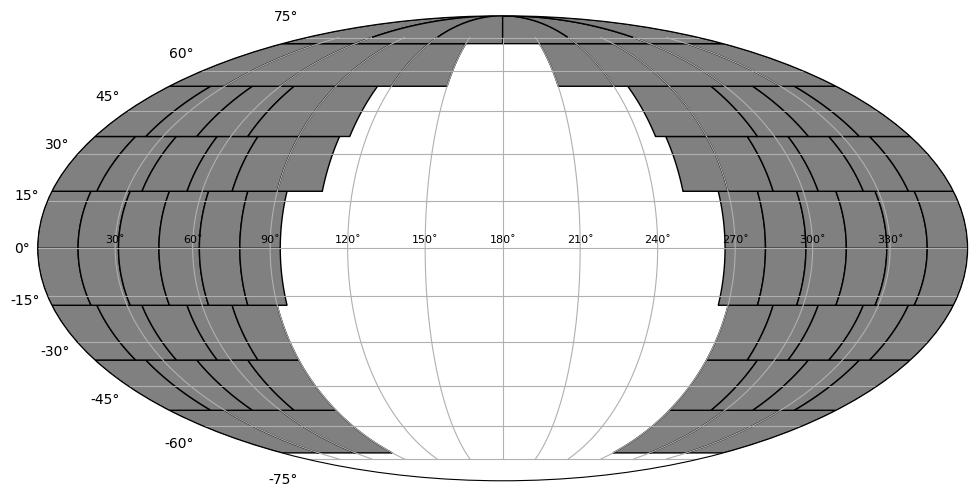

In [18]:
import matplotlib.pyplot as plt

def plot_map(map_obj):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection="mollweide")
    ax.grid(True)
    good = (map_obj.projected_area>0)
    for k in range(map_obj.ncell):
        lats = map_obj.corners_latlon[k][0]
        lons = map_obj.corners_latlon[k][1]

        y = np.array([lats[0], lats[1], lats[3], lats[2]]) - np.pi/2
        x = np.array([lons[0], lons[1], lons[3], lons[2]]) - np.pi
        # Plot the polygon
        if good[k]:
            poly = plt.Polygon(np.column_stack((x, y)), facecolor='gray', edgecolor='black')
            ax.add_patch(poly)
            #ax.text(x.mean(), y.mean(), f"{k}", size=8)
        #ax.text(x.mean()-0.1, y.mean()-0.07, f"a:{map_obj.projected_area[k]:.3f}", size=5)

    # Set plot parameters
    ax.set_xticklabels([f'{deg}˚' for deg in [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]], fontsize=8)

plot_map(this_map)

In [9]:
def make_eqarea_grid(ncell):
    """Make grids of phi and theta values with the specified number of
    cells of roughly equal area. Returns phi and theta of cell centers. 
    Phi ranges from 0 to 2pi, and theta ranges from -pi/2 (in fact 0) 
    to pi/2 (in fact pi).

    Returns:
        phi: List of 1d arrays of size N_cells_per_row
        theta: 1d array of size nlat (number of rows)
    """
    # 2023-03-25 XQ: make equal area grids
    def find_number_of_rows(Ncell, m0=10):
        diff_old = Ncell
        m = m0
        while True:
            ncells_per_row = np.array([int(2 * m * np.cos(n*np.pi/m)) for n in range(1, int(m/2))])
            Ncell_new = 2 * np.sum(ncells_per_row)
            diff = Ncell - Ncell_new
            if np.abs(diff) > np.abs(diff_old):
                return 2*len(ncells_per_row_old), Ncell_old, ncells_per_row_old
            if diff > 0:
                m += 2
            else:
                m -= 2
            Ncell_old = Ncell_new
            ncells_per_row_old = ncells_per_row
            diff_old = diff

    nlat, ncell_true, ncells_per_row = find_number_of_rows(ncell)
    ncells_per_row = np.concatenate([np.flip(ncells_per_row), ncells_per_row])
    height = np.pi / nlat
    theta = np.array([height/2 + n * height for n in range(0, nlat)])
    widths = np.pi * 2 / ncells_per_row
    phi = [None for i in range(nlat)]
    for m in range(nlat):
        phi[m] = np.array([widths[m]/2 + n * widths[m] for n in range(ncells_per_row[m])])

    return phi, theta, height, widths, ncell_true

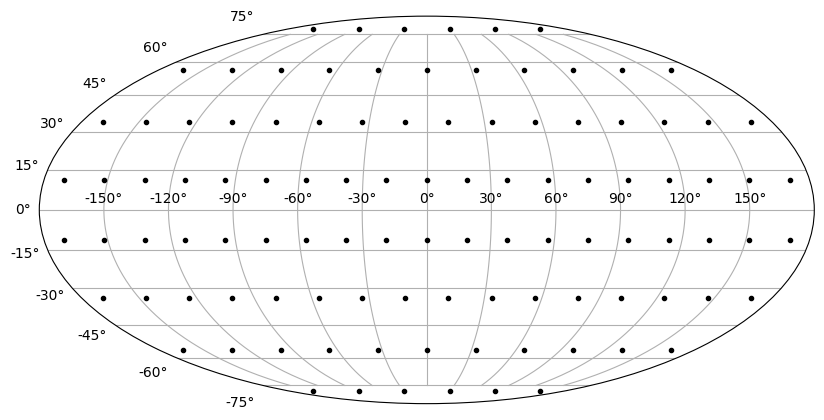

In [89]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="mollweide")
ax.grid(True)

for m in range(nlat):
    plt.plot(phi[m] - np.pi, np.ones(len(phi[m]))*theta[m] - np.pi/2,  ".", color="k")

In [10]:
def polyarea(x, y):
    """Compute the area of a polygon whose vertices are at the points (x,y).

    :INPUTS:
      x, y : 1D sequences
        Cartesian coordinates of the (non-intersecting) polygon.

    :REFERENCE:
      http://mathworld.wolfram.com/PolygonArea.html
    """
    # 2013-05-29 12:18 IJMC: Created

    area = 0.
    npts = max(len(x), len(y))
    for ii in range(npts): # EB: xrange to range
        area += x[ii]*y[(ii+1) % npts] - x[(ii+1) % npts]*y[ii]
    return  np.abs(area*0.5)

class mapcell:
    def __init__(self):
        self.corners = np.zeros((3, 4), dtype=float)
        self.corners_latlon = np.zeros((2, 4), dtype=float)
        self.vcorners = np.zeros((3, 4), dtype=float)
        self.rvcorners = np.zeros(4, dtype=float)
        self.visible_corners = np.zeros((3, 4), dtype=float)
        self.visible_vcorners = np.zeros((3, 4), dtype=float)
        self.visible_rvcorners = np.zeros(4, dtype=float)
        self.projected_area = 0.
        self.mu = 0.
        return

    def get_mu(self):
        ### Compute mu:
        normal_vector = np.dot(np.linalg.pinv(self.corners.T), np.ones(4))
        self.mu = normal_vector[0] / np.sqrt(np.dot(normal_vector, normal_vector))
        return

    def get_projected_area(self, i):
        if (self.corners[0] <= 0).all():
            # cell is hidden, on the back side.
            area = 0. 
            self.visible_corners = self.corners * np.nan
        elif (self.corners[0] > 0).all():
            # cell is completely visible, on the front side.
            self.visible_corners = self.corners
            y = self.corners[1]
            z = self.corners[2]
            
            inds = np.argsort(np.arctan2(z-z.mean(), y-y.mean()))
            area = polyarea(y[inds], z[inds])
        else:
            # Cell is only partially visible (on the limb). Find the
            # nearest point on on the limb, with the same latitude as
            # each vertex.
            visible_corners = self.corners.copy()
            back_indices = (visible_corners[0] < 0).nonzero()[0]
            for ii in back_indices:
                newx = 0. # on the limb!
                newy = np.sin(self.corners_latlon[0,ii]) * \
                    np.sqrt(1. - np.tan(i)**2 / np.tan(self.corners_latlon[0,ii])**2)
                if visible_corners[1,ii]/newy < 0: 
                    newy *= -1
                newz = np.cos(self.corners_latlon[0,ii]) / np.cos(i)
                visible_corners[:, ii] = newx, newy, newz
                    
            if not (np.isfinite(visible_corners)).all():
                self.visible_corners = self.corners * np.nan
                area = 0
                #print( "Non-finite projected corners; need to fix this.") # EB updated print statement
            else:
                self.visible_corners = visible_corners

                y = self.visible_corners[1]
                z = self.visible_corners[2]
                #yz = np.array(zip(y,z)) #2017-01-10 13:04 IJMC: removed: np.unique(zip(y,z))
                #inds = np.argsort(np.arctan2(yz[:,1]-yz[:,1].mean(), yz[:,0]-yz[:,0].mean()))
                #area = polyarea(yz[inds,0], yz[inds,1])
                area = 0.
        self.projected_area = area
        
        return


In [11]:
ncell = 100
deltaphi = 0
i = 0

phi, theta, height, widths, ncell_true = make_eqarea_grid(ncell)
nlon = np.array([len(row) for row in phi])
nlat = len(nlon)
print(ncell_true, nlon)

phi_corners = [np.zeros((4, nlon[m])) for m in range(nlat)]
theta_corners = np.zeros((4, nlat))
print(phi_corners[1].shape, theta_corners.shape)
for m in range(nlat):
    for i in range(nlon[m]):
        phi_corners[m][:,i] = np.array([
            phi[m][i]-widths[m]/2, phi[m][i]+widths[m]/2, # corner 0, 1
            phi[m][i]-widths[m]/2, phi[m][i]+widths[m]/2  # corner 2, 3
        ])

        theta_corners[:,m] = np.array([
            theta[m]-height/2, theta[m]-height/2, # corner 0, 1
            theta[m]+height/2, theta[m]+height/2  # corner 2, 3
        ])

# rotate by delta phi
phi_corners_2d = np.concatenate([phi_corners[m] for m in range(nlat)], axis=1)
phi_corners_2d_rot = np.concatenate([phi_corners[m] + deltaphi for m in range(nlat)], axis=1)
theta_corners_2d = np.concatenate([np.tile(theta_corners[:,i], (nlon[i], 1)).T for i in range(nlat)], axis=1)

phi_corners_1d = phi_corners_2d_rot.ravel()
theta_corners_1d = theta_corners_2d.ravel()

rot_matrix = np.array([
    [np.cos(i),    0, -np.sin(i)], 
    [        0,    1,          0], 
    [np.sin(i),    0,  np.cos(i)]
])
xyz_1d = np.stack((
    np.sin(theta_corners_1d) * np.cos(phi_corners_1d),
    np.sin(theta_corners_1d) * np.sin(phi_corners_1d),
    np.cos(theta_corners_1d)
))

xyz_1d_rot = np.dot(rot_matrix, xyz_1d)
xyz_2d = xyz_1d_rot.reshape(3, 4, ncell_true)
start = 0
xyz_3d = []
theta_corners_3d = []
phi_corners_3d = []
for m in range(nlat):
    xyz_3d.append(xyz_2d[:, :, start:start+nlon[m]])
    theta_corners_3d.append(theta_corners_2d[:, start:start+nlon[m]])
    phi_corners_3d.append(phi_corners_2d[:, start:start+nlon[m]])
    start = start + nlon[m]

104 [ 6 11 16 19 19 16 11  6]
(4, 11) (4, 8)


In [29]:
theta_corners_3d[1][:,0]

array([0.39269908, 0.39269908, 0.78539816, 0.78539816])

In [46]:
xyz_3d[3].shape

(3, 4, 19)

In [49]:
kk=0
for m in range(nlat): # the m_th row
    print("row:", m)
    for ii in range(nlon[m]):
        cell = mapcell()
        cell.corners = xyz_3d[m][:,:,ii]
        cell.corners_latlon = np.vstack([theta_corners_3d[m][:,ii], phi_corners_3d[m][:,ii]])
        cell.rvcorners = xyz_3d[m][1,:,ii] * np.cos(i)
        cell.get_projected_area(i)
        cell.get_mu()
        cell.visible_rvcorners = cell.visible_corners[1] * np.cos(i)

row: 0
row: 1
row: 2
row: 3
row: 4
row: 5
row: 6
row: 7


/var/folders/0q/dylv__nn23gfz6mtsk9ys_6r0000gn/T/ipykernel_84474/2680251102.py:60: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(1. - np.tan(i)**2 / np.tan(self.corners_latlon[0,ii])**2)


In [9]:
import re
OVERLEAF_BLANK_PROJECT_REGEX_TEMPLATE = r"[\n\r\s]+".join(
    [
        r"\\documentclass{article}",
        r"(\\usepackage{graphicx} % Required for inserting images)|(\\usepackage\[utf8\]{inputenc})",
        r"\\title{[^\n{}]+?}",
        r"\\author{[^\n{}]+?}",
        r"\\date{[^\n{}]+?}",
        r"\\begin{document}",
        r"\\maketitle",
        r"\\section{Introduction}",
        r"\\end{document}",
    ]
)

latexfile = "main.tex"
with open(latexfile, "r") as f:
    contents = f.read()

if re.match(OVERLEAF_BLANK_PROJECT_REGEX_TEMPLATE, contents):
    print("pass")

pass
